## Basic instructions of using Sci-kiet image module
[scikit-image](https://scikit-image.org/) is an image processing Python package that works with NumPy arrays.To use the scikit image module, simple type

In [0]:
import skimage

scikit-image provides some example images in its library. For example, you can load an image by typing

In [0]:
img = skimage.data.camera()

More image samples can be found [here](https://scikit-image.org/docs/dev/api/skimage.data.html?highlight=data#module-skimage.data).

Within sci-kit-image, images are represented as NumPy arrays. You can use the function
```python
type() 
``` 
to check the datatype of the img variable

In [0]:
# show the data type of img
type(img)

numpy.ndarray

The `shape` attribute addresses the structure of the array. A grayscale image is represented as a $M\times N$ array where $M$ is the *height* (i.e. number of rows) of the image and $N$ is the *width* (i.e. number of columns) of the image.

ps. A color image will be stored as a $M\times N\times C$ array, where $C$ is the number of *channels* (In terms of a true color (RGB) image, $C$=3)

In [0]:
# show the dimension of img
img.shape

(512, 512)

To display an image, we use another module called `matplotlib`

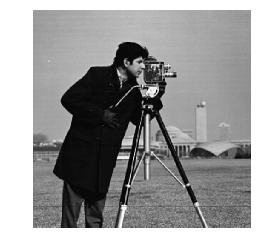

In [0]:
import matplotlib.pyplot as plt
# display this image
plt.imshow(img, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

Two-dimensional grayscale images are indexed by row and columns (abbreviated to either (row, col) or (r, c)), with the lowest element (0, 0) at the top-left corner. 
To access the value at a specific location, simply type

In [0]:
img[10, 3]

153

Numpy supports *array slicing*. To obtain a region of an image, use

In [0]:
img[5:15, 5:15]

array([[156, 154, 155, 158, 157, 156, 157, 159, 158, 158],
       [156, 155, 155, 157, 157, 158, 158, 158, 158, 158],
       [157, 158, 157, 157, 158, 160, 159, 158, 158, 159],
       [157, 158, 158, 158, 157, 158, 157, 157, 155, 156],
       [157, 159, 159, 159, 157, 156, 155, 156, 154, 154],
       [156, 158, 157, 157, 157, 157, 154, 154, 154, 156],
       [156, 157, 156, 156, 157, 159, 155, 153, 155, 159],
       [156, 156, 154, 154, 154, 156, 154, 153, 153, 156],
       [157, 157, 154, 153, 153, 155, 154, 154, 153, 154],
       [156, 157, 155, 154, 154, 156, 155, 154, 155, 157]], dtype=uint8)

A tutorial to use the sci-kit image module can be found [here](http://scikit-image.org/docs/dev/user_guide/getting_started.html
)

### Resize images
To resize an image, we can use the provided function in `skimage.transform.module`. 
If you just want to scale an image, you can use
```python
skimage.transform.rescale(image, scale, multichannel=False)
```
If you want ot resize an image to desired size, use
```python
skimage.transform.resize(image, output_shape, multichannel=False)

```
Please refer to [skimage.transform.resize](https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.resize) for more information.

In [0]:
print(f'original size is {img.shape}')
img_rz = skimage.transform.rescale(img, 0.2, multichannel=False)
print(f'the size after scaling is {img_rz.shape}')

original size is (512, 512)
the size after scaling is (102, 102)


In [0]:
# r, c is 512
r, c = img.shape
# here we resize the image to 25% of the original size
img_256 = skimage.transform.resize(img, (r/2, c/2), anti_aliasing=False)
img_128 = skimage.transform.resize(img, (r/4, c/4), anti_aliasing=False)

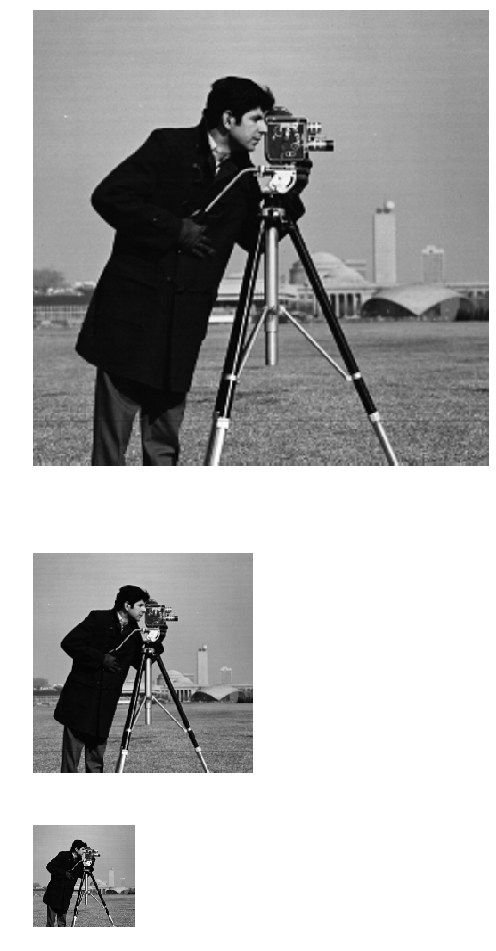

In [0]:
plt.figure(figsize=(7,14))
ax1 = plt.subplot2grid((7, 4), (0, 0), colspan=4, rowspan=4)
ax2 = plt.subplot2grid((7, 4), (4, 0), colspan=2, rowspan=2)
ax3 = plt.subplot2grid((7, 4), (6, 0), colspan=1, rowspan=1)
ax1.imshow(img, cmap='gray')
ax1.axis('off')
ax2.imshow(img_256, cmap='gray')
ax2.axis('off')
ax3.imshow(img_128, cmap='gray')
ax3.axis('off')
plt.tight_layout()

We can see that the sampled image has some jaggies along the edges. Now we turn the anti-aliasing mode on and invoke the resize method again.

In [0]:
img_128_aa = skimage.transform.resize(img, (r/4, c/4), anti_aliasing=True)

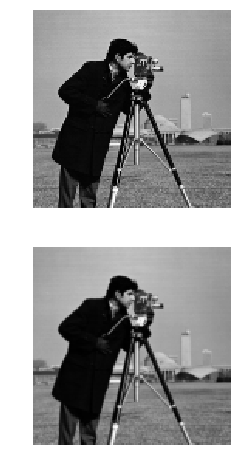

In [0]:
plt.figure(figsize=(4,8))
ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=1)
ax1.imshow(img_128, cmap='gray')
ax1.axis('off')
ax2.imshow(img_128_aa, cmap='gray')
ax2.axis('off')
plt.show()

### Color quantization
We want to represent colors with fewer bits. For example, there are only 16 levels if we use 4 bits to represent gray levels.  A very intuitive approach is *uniform quantization*, which evenly divides the gray levels.

In [0]:
import numpy

In [0]:
def quantize(image, max_level=1, n_bits=4):
    """Quantize an image.
    Parameters
    ----------
    image : array_like
        Input image.
    max_level : int
        Maximum input value.
    n_bits : int
        Number of quantization levels.
    """
    # Return evenly spaced numbers over a specified interval
    T = numpy.linspace(0, max_level, 2**n_bits, endpoint=False)[1:]
    # Return the indices of the bins to which each value in input array belongs
    # scale it back to 0-255
    return numpy.digitize(image.flat, T).reshape(image.shape)*(2**(8-n_bits))

You can refer to [numpy.digitize](https://docs.scipy.org/doc/numpy/reference/generated/numpy.digitize.html) to see how it works. 

In [0]:
img_4b = quantize(img, 255, 4)
img_2b = quantize(img, 255, 2)
img_1b = quantize(img, 255, 1)

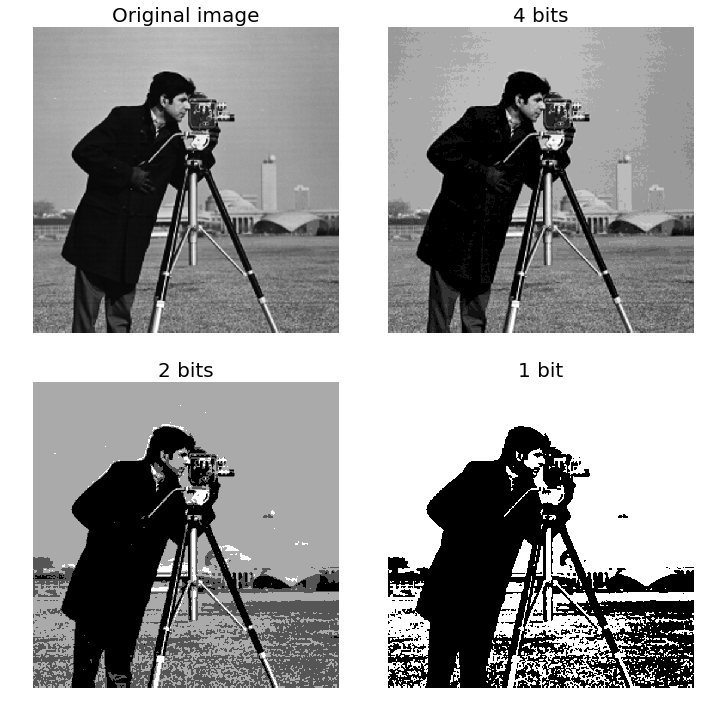

In [0]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,10))
ax = axes.ravel()

ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original image",fontsize=20)
ax[0].axis('off')

ax[1].imshow(img_4b, cmap='gray')
ax[1].set_title("4 bits",fontsize=20)
ax[1].axis('off')

ax[2].imshow(img_2b, cmap='gray')
ax[2].set_title("2 bits",fontsize=20)
ax[2].axis('off')

ax[3].imshow(img_1b, cmap='gray')
ax[3].set_title("1 bit",fontsize=20)
ax[3].axis('off')

plt.tight_layout()
plt.show()

### Dithering
Dithering is used to randomize quantization error, preventing false contouring due to quantization error. Representing images with only two tones is also known as [halftoning](https://en.wikipedia.org/wiki/Halftone).

We can devise a matrix so that grayscales are represented evenly in this region:  
$M_2=\frac{1}{4}\begin{bmatrix}
0&2\\3&1
\end{bmatrix}$
or
$M_4=\frac{1}{16}\begin{bmatrix}
0&8&2&10\\12&4&14&6\\3&11&1&9\\15&7&13&5
\end{bmatrix}$


For matrices whose dimensions are a power of two, the matrix can be generated recursively:  
$M_{2n}=\frac{1}{4n^2}\begin{bmatrix}
4n^2\times M_n&4n^2\times M_n+2\\4n^2\times M_n+3&4n^2\times M_n+1
\end{bmatrix}$

so, we can write a function to generate this matrix:

In [0]:
def create_matrix(order):
    if order == 1: return numpy.array([[0,2],[3,1]])/4
    mat_base = numpy.array([[0,2],[3,1]])
    for i in range(1,order):
        mat_new = numpy.vstack([numpy.hstack([4*mat_base, 4*mat_base+2]),numpy.hstack([4*mat_base+3, 4*mat_base+1])])
        mat_base = mat_new
    return mat_new / numpy.power(2, order)**2

def order_dither(image, order=2):
    img = skimage.img_as_float(image)
    mask = create_matrix(order)
    # duplicate the matrix and make it as large as the input image
    mask = numpy.tile(mask,
              (int(img.shape[0]/mask.shape[0]),int(img.shape[1]/mask.shape[1])))

    if img.ndim > 2:
        row, col, d = img.shape
        out = numpy.copy(img)
        for i in range(d):
            out[:,:,i] = img[:,:,i] > mask
        out = skimage.img_as_ubyte(out)
        
    else:
        row, col = image.shape
        out = skimage.img_as_ubyte(img > mask)

    return out

In [0]:
out = order_dither(img, order=1)

Because the matplotlib does not render the dithered image very well, here we use another way to display the real size of the image.

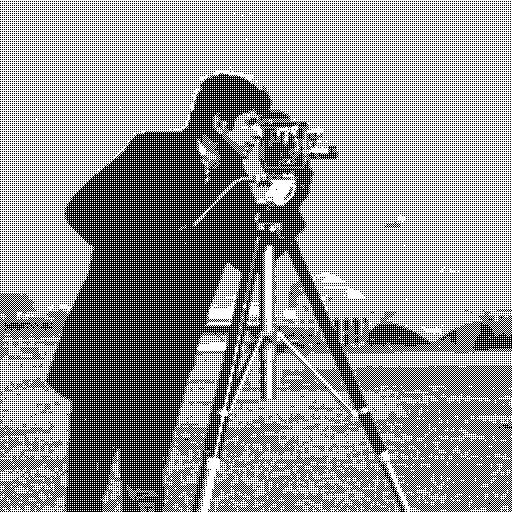

In [0]:
# reference: https://stackoverflow.com/a/45206290
import PIL.Image
from io import BytesIO
import IPython.display
f = BytesIO()
PIL.Image.fromarray(out).save(f, 'jpeg')
IPython.display.display(IPython.display.Image(data=f.getvalue()))

### Error diffusion
Spread **errors** to neighboring pixels

In [0]:
def err_diffuse(image, offsets, weights, n_bits=2):
    """
    References
    ----------
    http://www.efg2.com/Lab/Library/ImageProcessing/DHALF.TXT
    """
    image = skimage.img_as_float(image.copy())

    weights = weights / numpy.sum(weights)

    T = numpy.linspace(0, 1, n_bits, endpoint=False)[1:]
    rows, cols = image.shape

    out = numpy.zeros_like(image, dtype=float)
    for i in range(rows):
        for j in range(cols):
            # Quantize
            out[i, j], = numpy.digitize([image[i, j]], T)

            # Propagate quantization noise
            E = (image[i, j] - out[i, j] / (n_bits - 1))
            for (ii, jj), w in zip(offsets, weights):
                ii = i + ii
                jj = j + jj
                if ii < rows and jj < cols:
                    image[ii, jj] += E * w

    return skimage.img_as_ubyte(out)

In [0]:
def floyd_steinberg(image, n_bits):
    offsets = [(0, 1), (1, -1), (1, 0), (1, 1)]
    weights = [    7,
           3, 5, 1]
    return err_diffuse(image, offsets, weights, n_bits)

def JJN(image, n_bits):
    offsets = [(0, 1), (0, 2), (1, -2), (1, -1), (1, 0), (1, 1), (1, 2), (2, -2), (2, -1), (2, 0), (2, 1), (2, 2)]
    weights = [      7, 5,
           3, 5, 7, 5, 3,
           1, 3, 5, 3, 1]
    return err_diffuse(image, offsets, weights, n_bits)

First we try the floyd-steinberg algorithm

In [0]:
out = floyd_steinberg(img, n_bits=2)

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


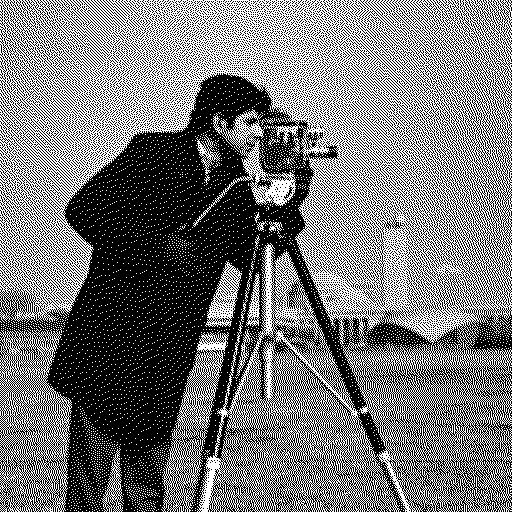

In [0]:
f = BytesIO()
PIL.Image.fromarray(out).save(f, 'jpeg')
IPython.display.display(IPython.display.Image(data=f.getvalue()))

We can try the JJN algorithm

In [0]:
out = JJN(img, n_bits=2)

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


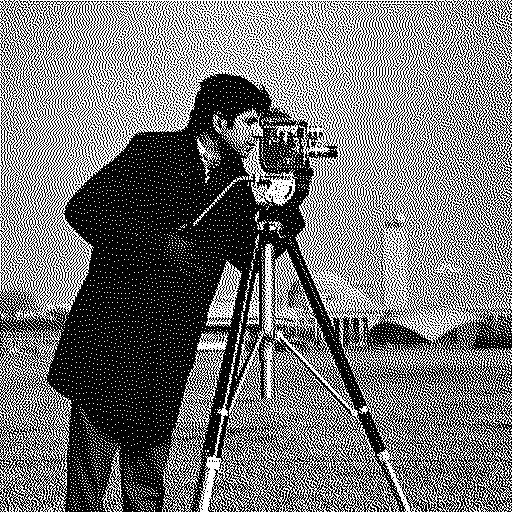

In [0]:
f = BytesIO()
PIL.Image.fromarray(out).save(f, 'jpeg')
IPython.display.display(IPython.display.Image(data=f.getvalue()))